# QUESTION 1 FOREST FIRE DATA
# CLASSIFY THE SIZE_CATEGORIES USING SVM


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv(r"C:\Users\Vanshika\Downloads\forestfires (1).csv")

In [3]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [5]:
df.shape

(517, 31)

In [6]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
df.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [8]:
corelation = df.corr()


<AxesSubplot:>

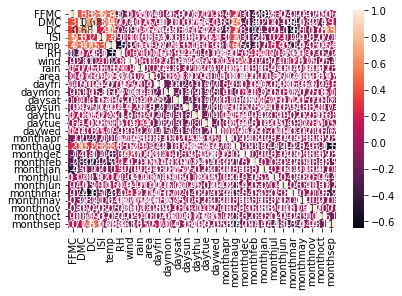

In [9]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot = True)

In [10]:
df1 = df.copy()

In [11]:
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [12]:
df1[df1.columns[0:11]].describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [13]:
df1[df1.columns[0:11]].isnull().sum()

month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [14]:
corr = df1[df1.columns[0:11]].corr()

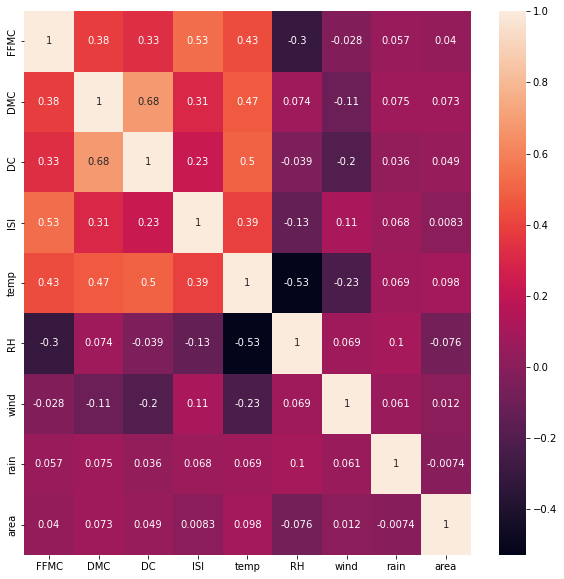

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True)
plt.show()

C:\Users\Vanshika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


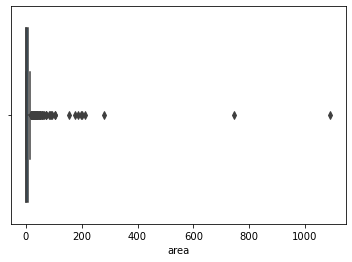

In [16]:
ax = sns.boxplot(df1['area'])
plt.show()

In [17]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


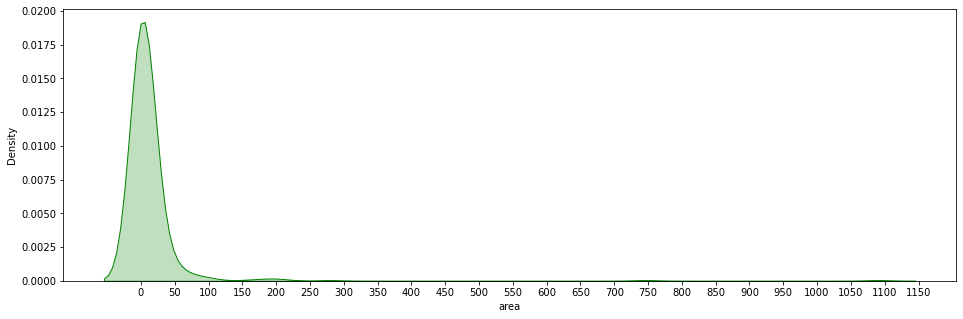

In [18]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['area'].skew()))
print("Kurtosis: {}".format(df1['area'].kurtosis()))
ax = sns.kdeplot(df1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [19]:
dfa = df1[df1.columns[0:10]]
month_colum = dfa.select_dtypes(include='object').columns.tolist()

In [20]:
dfa

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


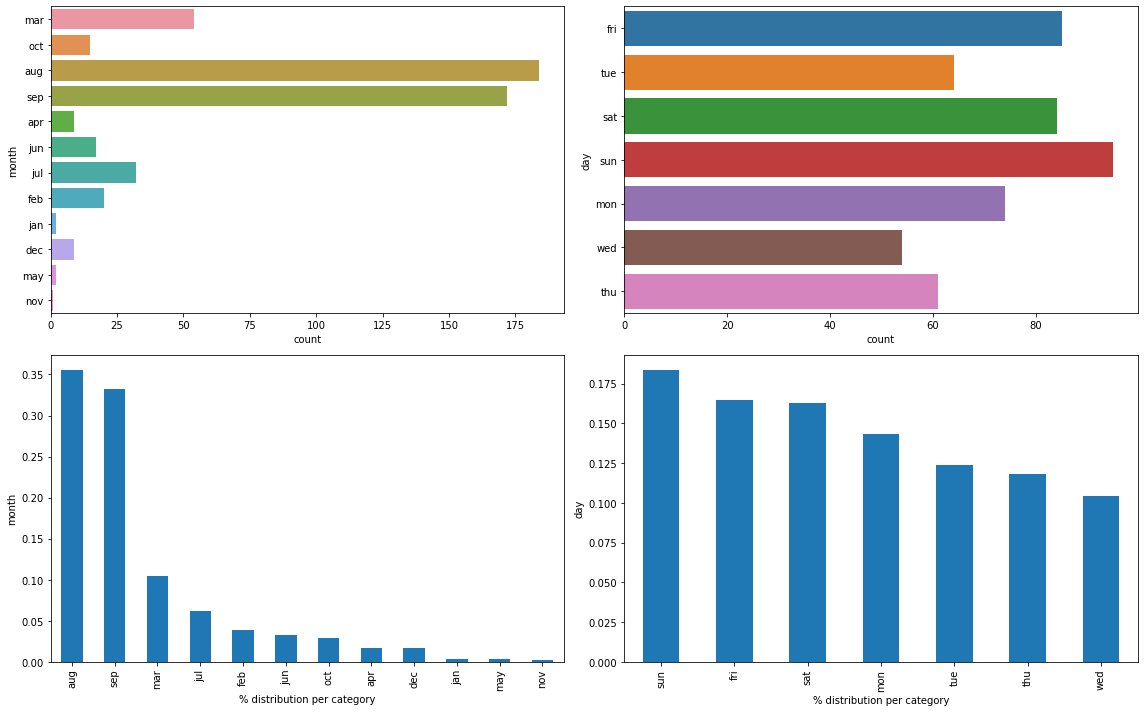

In [21]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [22]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

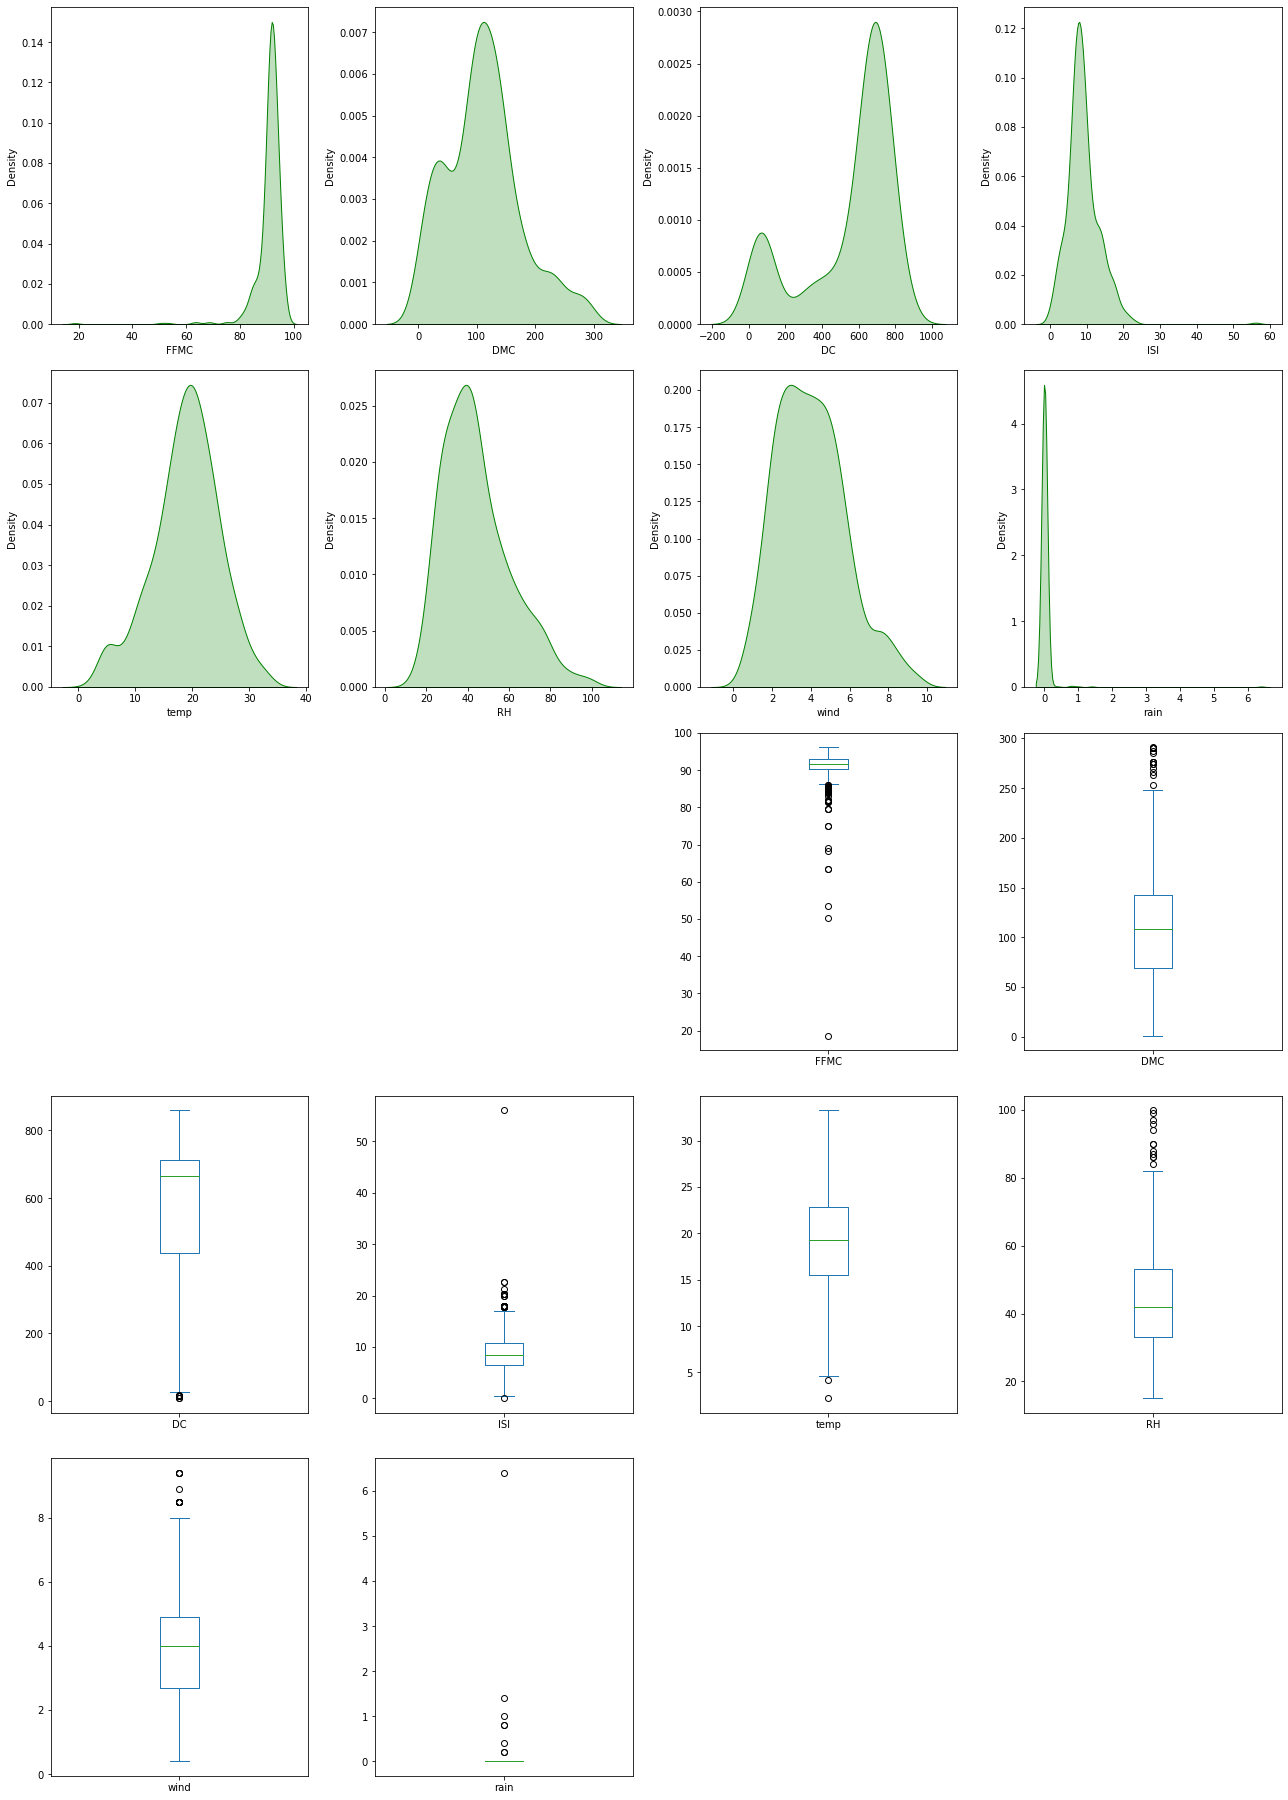

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [23]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [24]:
X = df1.iloc[:,2:30]
y = df1.iloc[:,30]

In [25]:
mapping = {'small': 1, 'large': 2}

In [26]:

y = y.replace(mapping)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, stratify = y)

In [28]:
# Linear
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.9711538461538461


In [29]:
# Poly
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.7692307692307693


In [30]:
# RBF
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.75


In [31]:
# Sigmoid
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.6923076923076923


In [32]:
##Linear Model gives the best accuracy
## Below is an exmaple on how we can plot the data. I used PCA to select only 2 variables

In [33]:
ytt = y_train.to_numpy()

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components = 2)

In [36]:
x_train2 = pca.fit_transform(x_train)

In [37]:
model_linear.fit(x_train2,ytt)

SVC(kernel='linear')

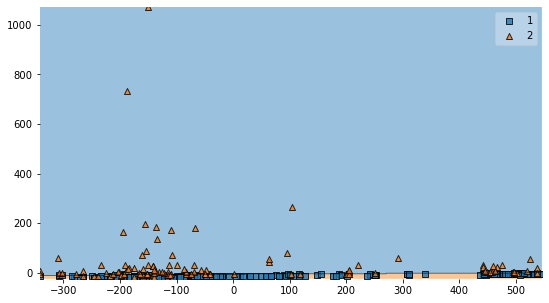

In [38]:
plot_decision_regions(x_train2,ytt, clf=model_linear)
plt.show()

###   QUESTION 2 SALARY DATA

In [39]:
## PREPARE A CALSSIFIFCATION MODEL USING SVM FOR SALARY DATA

In [40]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions

In [43]:
test_tmp = pd.read_csv(r"C:\Users\Vanshika\Downloads\SalaryData_Test(1).csv.crdownload")

In [46]:
test_tmp

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10758,26,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
10759,30,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,>50K
10760,67,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,20,United-States,>50K
10761,46,Private,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,4650,0,44,United-States,<=50K


In [47]:
train_tmp = pd.read_csv(r"C:\Users\Vanshika\Downloads\SalaryData_Train(1).csv.crdownload")

In [48]:
train_tmp

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15631,29,Private,HS-grad,9,Never-married,Craft-repair,Unmarried,White,Female,0,0,42,United-States,<=50K
15632,23,Private,Bachelors,13,Never-married,Tech-support,Not-in-family,Black,Female,0,0,45,United-States,<=50K
15633,46,Private,Some-college,10,Separated,Sales,Not-in-family,White,Male,0,0,42,United-States,<=50K
15634,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,15,United-States,<=50K


In [49]:
df_tmp = test_tmp.append(train_tmp)

In [50]:
df_tmp

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15631,29,Private,HS-grad,9,Never-married,Craft-repair,Unmarried,White,Female,0,0,42,United-States,<=50K
15632,23,Private,Bachelors,13,Never-married,Tech-support,Not-in-family,Black,Female,0,0,45,United-States,<=50K
15633,46,Private,Some-college,10,Separated,Sales,Not-in-family,White,Male,0,0,42,United-States,<=50K
15634,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,15,United-States,<=50K


In [51]:
test = test_tmp.copy()
train = train_tmp.copy()

In [52]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15631,29,Private,HS-grad,9,Never-married,Craft-repair,Unmarried,White,Female,0,0,42,United-States,<=50K
15632,23,Private,Bachelors,13,Never-married,Tech-support,Not-in-family,Black,Female,0,0,45,United-States,<=50K
15633,46,Private,Some-college,10,Separated,Sales,Not-in-family,White,Male,0,0,42,United-States,<=50K
15634,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,15,United-States,<=50K


In [53]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10758,26,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
10759,30,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,>50K
10760,67,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,20,United-States,>50K
10761,46,Private,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,4650,0,44,United-States,<=50K


In [54]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [55]:
number = LabelEncoder()

In [56]:
number


LabelEncoder()

In [57]:
for i in str_c:
    train[i]=number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

In [58]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,38,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,38,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,38,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,38,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,38,<=50K


In [59]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [60]:
mapping = {' >50k' :1,'<=50k':2}

In [61]:
train=train.replace({'Salary':mapping})
test = test.replace({'Salary': mapping})

In [62]:
df = train.append(test)

In [63]:
df1 = df.copy()

In [64]:
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10758,26,2,11,9,2,6,0,4,1,0,0,40,24,<=50K
10759,30,2,15,10,2,0,2,4,0,0,0,40,38,>50K
10760,67,4,9,13,2,9,0,4,1,0,0,20,38,>50K
10761,46,2,12,14,0,9,1,4,1,4650,0,44,38,<=50K


In [65]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,26399.0,38.522065,13.232096,17.0,28.0,37.0,47.0,90.0
workclass,26399.0,2.212129,0.963342,0.0,2.0,2.0,2.0,6.0
education,26399.0,10.325581,3.799389,0.0,9.0,11.0,12.0,15.0
educationno,26399.0,10.121899,2.544473,1.0,9.0,10.0,13.0,16.0
maritalstatus,26399.0,2.592825,1.501550,0.0,2.0,2.0,4.0,6.0
occupation,26399.0,5.951324,4.030494,0.0,2.0,6.0,9.0,13.0
relationship,26399.0,1.418311,1.598374,0.0,0.0,1.0,3.0,5.0
race,26399.0,3.685859,0.823637,0.0,4.0,4.0,4.0,4.0
sex,26399.0,0.675442,0.468218,0.0,0.0,1.0,1.0,1.0
capitalgain,26399.0,1097.320921,7574.161726,0.0,0.0,0.0,0.0,99999.0


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26399 entries, 0 to 10762
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            26399 non-null  int64 
 1   workclass      26399 non-null  int32 
 2   education      26399 non-null  int32 
 3   educationno    26399 non-null  int64 
 4   maritalstatus  26399 non-null  int32 
 5   occupation     26399 non-null  int32 
 6   relationship   26399 non-null  int32 
 7   race           26399 non-null  int32 
 8   sex            26399 non-null  int32 
 9   capitalgain    26399 non-null  int64 
 10  capitalloss    26399 non-null  int64 
 11  hoursperweek   26399 non-null  int64 
 12  native         26399 non-null  int32 
 13  Salary         26397 non-null  object
dtypes: int32(8), int64(5), object(1)
memory usage: 2.2+ MB


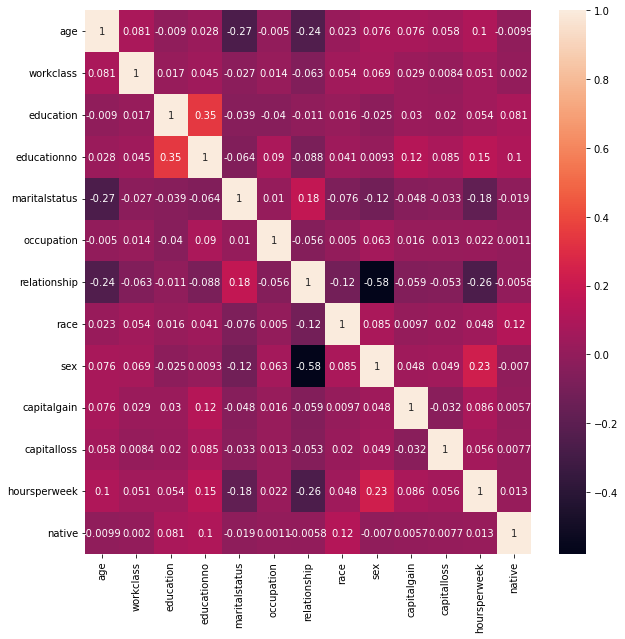

In [67]:
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [68]:
dfa = df_tmp[df_tmp.columns[0:13]]
obj_colum = dfa.select_dtypes(include='object').columns.tolist()

In [69]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

In [70]:
col = df1.columns

In [71]:
col

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [72]:
x_train = train[col[0:13]]
y_train = train[col[13]]
x_test = test[col[0:13]]
y_test = test[col[13]]

In [73]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [74]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [75]:
# Linear
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

ValueError: Input contains NaN

In [ ]:
#Poly
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

In [ ]:
# RBF
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

In [ ]:
# Sigmoid
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

## Poly model giving best accuracy

In [ ]:
ytt = y_train.to_numpy()

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
x_train2 = pca.fit_transform(x_train)

In [ ]:
model_linear.fit(x_train2,ytt)